# Examples

Let's figure out how to perform k-fold cross validation. For this, we will use the university acceptance dataset from Monday again. If you need to download it again, do so at this [link](https://drive.google.com/open?id=13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d)

We will first start by creating a multivariate model, and assessing it's accuracy.

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#load the data
data = pd.read_csv('data/uni_admission.csv')

# We will use 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.056914722197851236
Mean Squared Error: 0.005725926473228667
Root Mean Squared Error: 0.07566985181185878


Running the code above should yield an RMSE of ~ 0.0756. Let's now cross validate our model by using k-fold cross validation. We will use 5 folds for this example, and follow the documentation from [sklearn](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [9]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.11384971151782929

Training model 2
Model 2 Root Mean Squared Error: 0.06279391885787529

Training model 3
Model 3 Root Mean Squared Error: 0.05049941911260589

Training model 4
Model 4 Root Mean Squared Error: 0.06680059377472877

Training model 5
Model 5 Root Mean Squared Error: 0.059951106068342676


In [17]:
folds.split(X)

<generator object _BaseKFold.split at 0x00000173A26C19E0>

As you can tell from running the code, the RMSE value for our first model is fairly larger than the RMSE we found initially, and that of the other models. This would beg for an analysis of the specific indeces used. Perhaps most of the dataset's outliers were in the test set of model 1? as a challenge, perform a comparative analysis of the subset of the data used to test model 1 in comparison with the dataset as a whole.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in our initial approache. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

In [3]:
np.mean(RMSES)

0.07077894986627639

As you can see, the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 3 instead. 

Let's now highlight some variants of k-folds. A popular variant is called the leave one out cross validation, where the test data is just a single observation from your set. For a dataset of size **n**, this is the same as using kfold to create **n** folds. 


In [4]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 500 folds
trained 500 models


0.05209496129447928

In this scenario it is also helpful to plot out the RMSE values across all models:

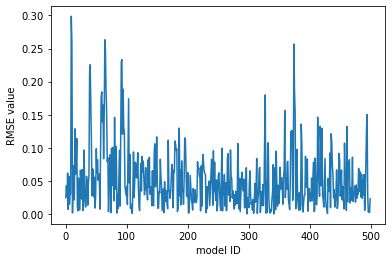

In [5]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

All in all, this indicates to us that it would be challenging to create a model that beats the ~0.05 average RMSE using this dataset. This is the benefit of using Leave One Out Cross validation: It gives us a sense of how best we can expect a given model to be using our dataset. Note however that this can be an extremely time consuming process for large datasets.

# Challenge 1

Revisit yesterday's challenge on wine quality, and use k-folds cross validation with 10 folds. Was your model good enough? Could you find a better performing model?

([Dataset link here](https://colab.research.google.com/drive/1IKt0hW3aWrKNwB0xxOQGjjWC8h3t_G8Q?authuser=1#scrollTo=-erZrimA8qNm))

In [22]:
wine = pd.read_csv('data/winequality-red.csv')
X=wine.drop(['quality','density','alcohol','fixed acidity','pH','sulphates','free sulfur dioxide','volatile acidity'],axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print(vif)

cols = list(vif['features'])

X = wine[cols]
y = wine['quality']
cols

['citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide']

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data.drop(columns=['Serial No.', 'admit_chance'])
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
cols = list(vif['features'])
X = data[cols]
y = data['admit_chance']
y

       features   vif_Factor
0           GRE  1308.061089
1         TOEFL  1215.951898
2    uni_rating    20.933361
3           SOP    35.265006
4           LOR    30.911476
5          CGPA   950.817985
6  publications     2.869493


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: admit_chance, Length: 500, dtype: float64

In [23]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)

  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1


KeyError: "None of [Int64Index([ 320,  321,  322,  323,  324,  325,  326,  327,  328,  329,\n            ...\n            1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598],\n           dtype='int64', length=1279)] are in the [columns]"

# Challenge 2
Another common variant of kfold is repeated kfold cross validation. This means that the folding and training processes get repeated several times, shuffling the dataset at each instance.

Read up n how to perform repeated kfold [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html#sklearn.model_selection.RepeatedKFold) 
 
Then, create a model to predict university admission again, this time using all independent varible, and krepeated kfold of your choice. Can you improve on the results without cross validation? Can you improve on the results from the Leave One Out cross validation?



In [7]:
# YOUR CODE GOES HERE
